# Linear Regression on House Prices (1D) with Keras

In this notebook we show how to perform linear regression on house prices data, using Keras.

## Define `X_train` and `Y_train`

In [1]:
import pandas as pd
import numpy as np
from numpy import transpose
from numpy import append
from numpy import reshape
import matplotlib.pyplot as plt
# %matplotlib notebook
import seaborn as sns

np.random.seed(42)
# tf.random.set_seed(42)
pd.set_option('display.max_columns', 100)

In [2]:
data = pd.read_csv('sources/train.csv')

data.fillna(0, inplace=True)
data['Surface'] = data['GrLivArea'] + data['TotalBsmtSF']
data_surface = data['Surface']
data_dum = pd.get_dummies(data['Neighborhood'])
data_saleprice = data['SalePrice']

data_new = pd.concat([data_surface, data_dum, data_saleprice], ignore_index=False, axis=1)
data_new.head(5)

Y_train = data_new['SalePrice'].to_numpy()
Y_train = Y_train.reshape(Y_train.shape[0],1)
data_new.drop('SalePrice',axis = 1, inplace = True)
X_train = data_new.to_numpy()

print(f"X train {X_train.shape}")
print(f"Y train {Y_train.shape}")

X train (1460, 26)
Y train (1460, 1)


## Model Sequential avec Keras
Define input layer. Number of neurons = number of features in `x`.

Define output layer, with 1 neuron.
`Dense` creates _fully-connected_ layer.

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
model = Sequential()
model = Sequential([
    Input(shape=X_train.shape[1:]),
    Dense(1)
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 27        
Total params: 27
Trainable params: 27
Non-trainable params: 0
_________________________________________________________________


### Scale features

"Normalizing" the data should help prevent values from "exploding":

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

## Set up optimizer and "compile" model
In Keras, optimizer is specified when "compiling" model.
(Last step to fix model training code!)

In [5]:
from tensorflow.keras.optimizers import SGD
loss="mse"
LEARNING_RATE = 0.001
model.compile(loss=loss, optimizer=SGD(lr=LEARNING_RATE))

## Fit model (i.e. run optimization)

The model still hasn't "seen" any data yet...

* With SGD we can choose the amount of data to be used to compute the loss function (`BATCH_SIZE`). This can be useful when the whole dataset doesn't fit in memory. We'll revisit this later!
* We need to choose for how many iterations to run SGD (`EPOCHS`).
* The `fit` method is a loop over epochs and batches!

In [6]:
BATCH_SIZE = X_train.shape[0] # computing the loss over the whole dataset
EPOCHS = 2000 # how many iterations over the whole dataset
history = model.fit(X_train, Y_train, epochs=EPOCHS, batch_size=BATCH_SIZE)

Train on 1460 samples
Epoch 1/2000
1460/1460 [==============================] - 0s 305us/sample - loss: 39039336448.0000
Epoch 2/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 38878806016.0000
Epoch 3/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 38718980096.0000
Epoch 4/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 38559866880.0000
Epoch 5/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 38401445888.0000
Epoch 6/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 38243725312.0000
Epoch 7/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 38086709248.0000
Epoch 8/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 37930377216.0000
Epoch 9/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 37774745600.0000
Epoch 10/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 37619806208.0000
Epoch

Epoch 85/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 27744890880.0000
Epoch 86/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 27633930240.0000
Epoch 87/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 27523452928.0000
Epoch 88/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 27413456896.0000
Epoch 89/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 27303944192.0000
Epoch 90/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 27194906624.0000
Epoch 91/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 27086344192.0000
Epoch 92/2000
1460/1460 [==============================] - 0s 3us/sample - loss: 26978248704.0000
Epoch 93/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 26870628352.0000
Epoch 94/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 26763470848.0000
Epoch 95/2000
1460/1

Epoch 168/2000
1460/1460 [==============================] - 0s 3us/sample - loss: 19996426240.0000
Epoch 169/2000
1460/1460 [==============================] - 0s 6us/sample - loss: 19919001600.0000
Epoch 170/2000
1460/1460 [==============================] - 0s 3us/sample - loss: 19841902592.0000
Epoch 171/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 19765145600.0000
Epoch 172/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 19688710144.0000
Epoch 173/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 19612606464.0000
Epoch 174/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 19536830464.0000
Epoch 175/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 19461376000.0000
Epoch 176/2000
1460/1460 [==============================] - 0s 3us/sample - loss: 19386249216.0000
Epoch 177/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 19311443968.0000
Epoch 178/

Epoch 251/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 14578185216.0000
Epoch 252/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 14523916288.0000
Epoch 253/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 14469880832.0000
Epoch 254/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 14416071680.0000
Epoch 255/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 14362492928.0000
Epoch 256/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 14309143552.0000
Epoch 257/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 14256019456.0000
Epoch 258/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 14203119616.0000
Epoch 259/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 14150443008.0000
Epoch 260/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 14097992704.0000
Epoch 261/

Epoch 334/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 10773699584.0000
Epoch 335/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 10735519744.0000
Epoch 336/2000
1460/1460 [==============================] - 0s 3us/sample - loss: 10697498624.0000
Epoch 337/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 10659638272.0000
Epoch 338/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 10621937664.0000
Epoch 339/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 10584396800.0000
Epoch 340/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 10547011584.0000
Epoch 341/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 10509785088.0000
Epoch 342/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 10472714240.0000
Epoch 343/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 10435799040.0000
Epoch 344/

Epoch 418/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 8065883136.0000
Epoch 419/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 8039045120.0000
Epoch 420/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 8012318720.0000
Epoch 421/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 7985703424.0000
Epoch 422/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 7959200256.0000
Epoch 423/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 7932808704.0000
Epoch 424/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 7906525696.0000
Epoch 425/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 7880351744.0000
Epoch 426/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 7854288384.0000
Epoch 427/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 7828331008.0000
Epoch 428/2000
1460/

Epoch 502/2000
1460/1460 [==============================] - 0s 3us/sample - loss: 6159919104.0000
Epoch 503/2000
1460/1460 [==============================] - 0s 4us/sample - loss: 6141000192.0000
Epoch 504/2000
1460/1460 [==============================] - 0s 9us/sample - loss: 6122159104.0000
Epoch 505/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 6103397376.0000
Epoch 506/2000
1460/1460 [==============================] - 0s 6us/sample - loss: 6084711424.0000
Epoch 507/2000
1460/1460 [==============================] - 0s 6us/sample - loss: 6066105344.0000
Epoch 508/2000
1460/1460 [==============================] - 0s 4us/sample - loss: 6047575040.0000
Epoch 509/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 6029121024.0000
Epoch 510/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 6010744832.0000
Epoch 511/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 5992442880.0000
Epoch 512/2000
1460/

Epoch 586/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 4814812160.0000
Epoch 587/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 4801443840.0000
Epoch 588/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 4788131328.0000
Epoch 589/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 4774873088.0000
Epoch 590/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 4761668608.0000
Epoch 591/2000
1460/1460 [==============================] - 0s 3us/sample - loss: 4748518912.0000
Epoch 592/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 4735424000.0000
Epoch 593/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 4722380288.0000
Epoch 594/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 4709392384.0000
Epoch 595/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 4696458752.0000
Epoch 596/2000
1460/

Epoch 670/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 3863408128.0000
Epoch 671/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 3853942016.0000
Epoch 672/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 3844514560.0000
Epoch 673/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 3835126528.0000
Epoch 674/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 3825776640.0000
Epoch 675/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 3816465152.0000
Epoch 676/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 3807192832.0000
Epoch 677/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 3797957120.0000
Epoch 678/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 3788760064.0000
Epoch 679/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 3779600896.0000
Epoch 680/2000
1460/

Epoch 754/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 3189183488.0000
Epoch 755/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 3182469376.0000
Epoch 756/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 3175783424.0000
Epoch 757/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 3169123072.0000
Epoch 758/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 3162491648.0000
Epoch 759/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 3155886336.0000
Epoch 760/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 3149308160.0000
Epoch 761/2000
1460/1460 [==============================] - 0s 3us/sample - loss: 3142756352.0000
Epoch 762/2000
1460/1460 [==============================] - 0s 3us/sample - loss: 3136232192.0000
Epoch 763/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 3129734400.0000
Epoch 764/2000
1460/

Epoch 838/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 2710619392.0000
Epoch 839/2000
1460/1460 [==============================] - 0s 9us/sample - loss: 2705850112.0000
Epoch 840/2000
1460/1460 [==============================] - 0s 3us/sample - loss: 2701100544.0000
Epoch 841/2000
1460/1460 [==============================] - 0s 7us/sample - loss: 2696370176.0000
Epoch 842/2000
1460/1460 [==============================] - 0s 3us/sample - loss: 2691658240.0000
Epoch 843/2000
1460/1460 [==============================] - 0s 9us/sample - loss: 2686965760.0000
Epoch 844/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 2682291968.0000
Epoch 845/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 2677637888.0000
Epoch 846/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 2673003008.0000
Epoch 847/2000
1460/1460 [==============================] - 0s 9us/sample - loss: 2668386048.0000
Epoch 848/2000
1460/

Epoch 922/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 2370467072.0000
Epoch 923/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 2367074816.0000
Epoch 924/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 2363696640.0000
Epoch 925/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 2360332288.0000
Epoch 926/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 2356980736.0000
Epoch 927/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 2353642240.0000
Epoch 928/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 2350318336.0000
Epoch 929/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 2347007744.0000
Epoch 930/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 2343710208.0000
Epoch 931/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 2340425728.0000
Epoch 932/2000
1460/

Epoch 1006/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 2128397568.0000
Epoch 1007/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 2125982336.0000
Epoch 1008/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 2123576704.0000
Epoch 1009/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 2121180672.0000
Epoch 1010/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 2118795008.0000
Epoch 1011/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 2116418176.0000
Epoch 1012/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 2114050560.0000
Epoch 1013/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 2111692672.0000
Epoch 1014/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 2109344256.0000
Epoch 1015/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 2107006464.0000
Epoch 1016

Epoch 1089/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1957680640.0000
Epoch 1090/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1955952128.0000
Epoch 1091/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1954230144.0000
Epoch 1092/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1952516224.0000
Epoch 1093/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 1950808448.0000
Epoch 1094/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1949106944.0000
Epoch 1095/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 1947412992.0000
Epoch 1096/2000
1460/1460 [==============================] - 0s 3us/sample - loss: 1945726080.0000
Epoch 1097/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1944045568.0000
Epoch 1098/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1942371968.0000
Epoch 1099

Epoch 1172/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1835457920.0000
Epoch 1173/2000
1460/1460 [==============================] - 0s 4us/sample - loss: 1834219904.0000
Epoch 1174/2000
1460/1460 [==============================] - 0s 3us/sample - loss: 1832986752.0000
Epoch 1175/2000
1460/1460 [==============================] - 0s 11us/sample - loss: 1831758336.0000
Epoch 1176/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1830535424.0000
Epoch 1177/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1829317376.0000
Epoch 1178/2000
1460/1460 [==============================] - 0s 7us/sample - loss: 1828103680.0000
Epoch 1179/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1826894592.0000
Epoch 1180/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 1825691264.0000
Epoch 1181/2000
1460/1460 [==============================] - 0s 7us/sample - loss: 1824492416.0000
Epoch 118

Epoch 1255/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1747882112.0000
Epoch 1256/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 1746994816.0000
Epoch 1257/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 1746110976.0000
Epoch 1258/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 1745230336.0000
Epoch 1259/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 1744353024.0000
Epoch 1260/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1743480192.0000
Epoch 1261/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1742610304.0000
Epoch 1262/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 1741743872.0000
Epoch 1263/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 1740880512.0000
Epoch 1264/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1740020992.0000
Epoch 1265

Epoch 1338/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1685082240.0000
Epoch 1339/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1684445568.0000
Epoch 1340/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1683811072.0000
Epoch 1341/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 1683179392.0000
Epoch 1342/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1682550016.0000
Epoch 1343/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1681923584.0000
Epoch 1344/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1681299840.0000
Epoch 1345/2000
1460/1460 [==============================] - 0s 3us/sample - loss: 1680678400.0000
Epoch 1346/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1680058752.0000
Epoch 1347/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 1679441920.0000
Epoch 1348

Epoch 1421/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 1640012544.0000
Epoch 1422/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1639555584.0000
Epoch 1423/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1639100288.0000
Epoch 1424/2000
1460/1460 [==============================] - 0s 3us/sample - loss: 1638646656.0000
Epoch 1425/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 1638194432.0000
Epoch 1426/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1637745024.0000
Epoch 1427/2000
1460/1460 [==============================] - 0s 11us/sample - loss: 1637296896.0000
Epoch 1428/2000
1460/1460 [==============================] - 0s 3us/sample - loss: 1636850432.0000
Epoch 1429/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1636406784.0000
Epoch 1430/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1635963904.0000
Epoch 143

Epoch 1504/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1607641216.0000
Epoch 1505/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1607312768.0000
Epoch 1506/2000
1460/1460 [==============================] - 0s 10us/sample - loss: 1606984960.0000
Epoch 1507/2000
1460/1460 [==============================] - 0s 3us/sample - loss: 1606659328.0000
Epoch 1508/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1606334976.0000
Epoch 1509/2000
1460/1460 [==============================] - 0s 3us/sample - loss: 1606011392.0000
Epoch 1510/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1605689472.0000
Epoch 1511/2000
1460/1460 [==============================] - 0s 9us/sample - loss: 1605368576.0000
Epoch 1512/2000
1460/1460 [==============================] - 0s 3us/sample - loss: 1605048960.0000
Epoch 1513/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1604731008.0000
Epoch 151

Epoch 1587/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1584370816.0000
Epoch 1588/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1584134528.0000
Epoch 1589/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 1583898880.0000
Epoch 1590/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 1583665024.0000
Epoch 1591/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1583431424.0000
Epoch 1592/2000
1460/1460 [==============================] - 0s 3us/sample - loss: 1583198336.0000
Epoch 1593/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1582966912.0000
Epoch 1594/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1582736384.0000
Epoch 1595/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 1582506752.0000
Epoch 1596/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 1582277632.0000
Epoch 1597

Epoch 1670/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1567627264.0000
Epoch 1671/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1567456768.0000
Epoch 1672/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1567287680.0000
Epoch 1673/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1567118976.0000
Epoch 1674/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 1566950656.0000
Epoch 1675/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 1566783360.0000
Epoch 1676/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 1566616576.0000
Epoch 1677/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1566450688.0000
Epoch 1678/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1566284928.0000
Epoch 1679/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 1566120192.0000
Epoch 1680

Epoch 1753/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1555567744.0000
Epoch 1754/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1555445248.0000
Epoch 1755/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1555323008.0000
Epoch 1756/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1555201536.0000
Epoch 1757/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1555080448.0000
Epoch 1758/2000
1460/1460 [==============================] - 0s 3us/sample - loss: 1554959744.0000
Epoch 1759/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1554839296.0000
Epoch 1760/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1554719488.0000
Epoch 1761/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 1554600448.0000
Epoch 1762/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1554481920.0000
Epoch 1763

Epoch 1836/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 1546872064.0000
Epoch 1837/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1546783744.0000
Epoch 1838/2000
1460/1460 [==============================] - 0s 3us/sample - loss: 1546695808.0000
Epoch 1839/2000
1460/1460 [==============================] - 0s 3us/sample - loss: 1546607744.0000
Epoch 1840/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1546520448.0000
Epoch 1841/2000
1460/1460 [==============================] - 0s 4us/sample - loss: 1546433280.0000
Epoch 1842/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 1546346752.0000
Epoch 1843/2000
1460/1460 [==============================] - 0s 3us/sample - loss: 1546260352.0000
Epoch 1844/2000
1460/1460 [==============================] - 0s 17us/sample - loss: 1546174208.0000
Epoch 1845/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1546088832.0000
Epoch 184

Epoch 1919/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1540594560.0000
Epoch 1920/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1540530816.0000
Epoch 1921/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 1540466944.0000
Epoch 1922/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1540403584.0000
Epoch 1923/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 1540340352.0000
Epoch 1924/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1540277760.0000
Epoch 1925/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1540215040.0000
Epoch 1926/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1540152576.0000
Epoch 1927/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1540090240.0000
Epoch 1928/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1540028288.0000
Epoch 1929

## Review learning curve

In [7]:
hist = pd.DataFrame(history.history)

/opt/conda/lib/python3.7/site-packages/pandas/core/indexes/base.py:111: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = op(self.values, np.asarray(other))


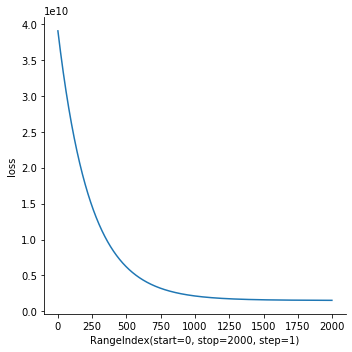

In [8]:
sns.relplot(x=hist.index, y="loss", kind="line", data=hist)

## Prepare for Kaggle submisison

In [9]:
data_test = pd.read_csv('sources/test.csv')

data_test.fillna(0, inplace=True)
data_test['Surface'] = data_test['GrLivArea'] + data_test['TotalBsmtSF']
data_test_surface = data_test['Surface']
data_test_dum = pd.get_dummies(data_test['Neighborhood'])

data_test_new = pd.concat([data_test_surface, data_test_dum], ignore_index=False, axis=1)
data_test_new.head(5)

X_test = data_test_new.to_numpy()

print(f"X test {X_test.shape}")

X test (1459, 26)


In [10]:
X_test = scaler.transform(X_test) # On applique le scaler sur les Surfaces du dataset de test

In [11]:
Y_test = model.predict(x=X_test)
Y_test = np.reshape(Y_test, Y_test.shape[0],)

In [12]:
data_test['SalePrice'] = Y_test
data_test.drop(data_test.columns.difference(['Id','SalePrice']), 1, inplace=True)
data_test.to_csv('storage/kaggle_submission_file.csv', index=False)